## Python notebook to plot Figure 28 of the manuscript: 'The GFDL-CM4X climate model hierarchy, Part II:case studies' by Griffies et al. 2025. 

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [10]:
#Dims = [-240,120,-90,90]

Dims = [290,380,20,70]
Central = 0.5*(Dims[0]+Dims[1])
CLim1_min=[10,60]
CLim2_min=[-20,20]
CLim1_max=[10,800]
CLim2_max=[-200,200]

        
Options = {
    'Dims':Dims,
    'central':Central,
    'CLim1_min':CLim1_min,
    'CLim2_min':CLim2_min,
    'CLim1_max':CLim1_max,
    'CLim2_max':CLim2_max,
}

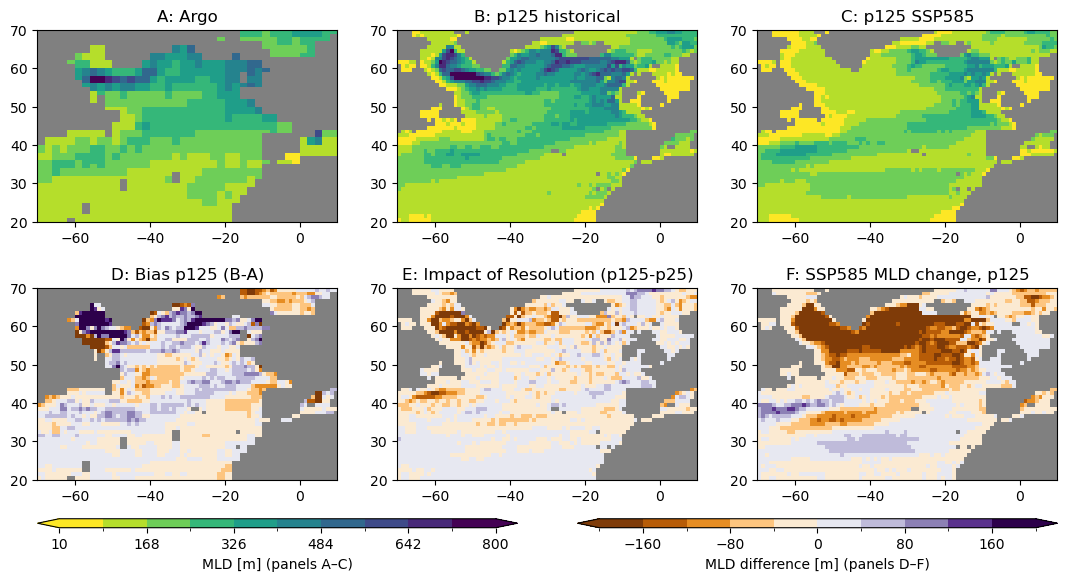

In [15]:


# directory where your combined files live
output_dir = 'netcdf_data_files/'

# names of the four configurations
config_names = [
    'config_p125hist',
    'config_p125ssp585',
    'config_p25hist',
    'config_p25ssp585',
]

# load each into a dict of Datasets
configs = {
    name: xr.open_dataset(f"{output_dir}{name}.nc")
    for name in config_names
}

for method in ['max']:
    # build the two colormaps
    cmap  = copy.copy(plt.cm.viridis_r);  cmap.set_bad('gray')
    cmap2 = copy.copy(plt.cm.PuOr);       cmap2.set_bad('gray')
    
    # contour levels from your Options dict
    levels  = np.linspace(*Options[f'CLim1_{method}'], 11)
    levels2 = np.linspace(*Options[f'CLim2_{method}'], 11)
    
    # create fig
    F = plt.figure(figsize=(12, 6))
    
    # grab lon/lat once
    lon = configs['config_p125hist'].lon.values
    lat = configs['config_p125hist'].lat.values
    lon2d, lat2d = np.meshgrid(lon, lat)
    
    # extract the four model fields
    p125hist    = configs['config_p125hist'][f'model_{method}'].values
    p25hist     = configs['config_p25hist'][f'model_{method}'].values
    p125ssp585  = configs['config_p125ssp585'][f'model_{method}'].values
    p25ssp585   = configs['config_p25ssp585'][f'model_{method}'].values
    
    # extract observations
    obs = configs['config_p25hist'][f'obs_{method}'].values
    
    # compute diagnostics
    p125bias         = p125hist    - obs
    p25bias          = p25hist     - obs
    p125p25diff      = p125hist    - p25hist
    climatechange_p25  = p25ssp585  - p25hist
    climatechange_p125 = p125ssp585 - p125hist
    
    # ---- panels A–C (absolute fields) ----
    ax = F.add_axes([0.1, 0.55, 0.25, 0.32])
    cb = ax.pcolormesh(lon2d, lat2d, obs,
                       shading='auto',
                       cmap=cmap,
                       norm=mpl.colors.BoundaryNorm(levels, ncolors=cmap.N))
    ax.set_title('A: Argo')
    ax.set_xlim([-70, 10]); ax.set_ylim([20, 70])
    
    ax = F.add_axes([0.4, 0.55, 0.25, 0.32])
    cb = ax.pcolormesh(lon2d, lat2d, p125hist,
                       shading='auto',
                       cmap=cmap,
                       norm=mpl.colors.BoundaryNorm(levels, ncolors=cmap.N))
    ax.set_title('B: p125 historical')
    ax.set_xlim([-70, 10]); ax.set_ylim([20, 70])
    
    ax = F.add_axes([0.7, 0.55, 0.25, 0.32])
    cb = ax.pcolormesh(lon2d, lat2d, p125ssp585,
                       shading='auto',
                       cmap=cmap,
                       norm=mpl.colors.BoundaryNorm(levels, ncolors=cmap.N))
    ax.set_title('C: p125 SSP585')
    ax.set_xlim([-70, 10]); ax.set_ylim([20, 70])
    
    # ---- panels D–F (differences) ----
    ax = F.add_axes([0.1, 0.12, 0.25, 0.32])
    cb2 = ax.pcolormesh(lon2d, lat2d, p125bias,
                        shading='auto',
                        cmap=cmap2,
                        norm=mpl.colors.BoundaryNorm(levels2, ncolors=cmap2.N))
    ax.set_title('D: Bias p125 (B-A)')
    ax.set_xlim([-70, 10]); ax.set_ylim([20, 70])
    
    ax = F.add_axes([0.4, 0.12, 0.25, 0.32])
    cb2 = ax.pcolormesh(lon2d, lat2d, p125p25diff,
                        shading='auto',
                        cmap=cmap2,
                        norm=mpl.colors.BoundaryNorm(levels2, ncolors=cmap2.N))
    ax.set_title('E: Impact of Resolution (p125-p25)')
    ax.set_xlim([-70, 10]); ax.set_ylim([20, 70])
    
    ax = F.add_axes([0.7, 0.12, 0.25, 0.32])
    cb2 = ax.pcolormesh(lon2d, lat2d, climatechange_p125,
                        shading='auto',
                        cmap=cmap2,
                        norm=mpl.colors.BoundaryNorm(levels2, ncolors=cmap2.N))
    ax.set_title('F: SSP585 MLD change, p125')
    ax.set_xlim([-70, 10]); ax.set_ylim([20, 70])
    
    # ---- colorbars ----
    cax1 = F.add_axes([0.1, 0.04, 0.4, 0.015])
    cbar1 = plt.colorbar(cb,  cax=cax1, orientation='horizontal', extend='both')
    cbar1.set_label('MLD [m] (panels A–C)')
    
    cax2 = F.add_axes([0.55, 0.04, 0.4, 0.015])
    cbar2 = plt.colorbar(cb2, cax=cax2, orientation='horizontal', extend='both')
    cbar2.set_label('MLD difference [m] (panels D–F)')
    
    plt.savefig('NATL_MLD_CM4x_winter.png',dpi=400,bbox_inches='tight')
    plt.show()